In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample points
points = np.array([[-2, 0], [0, 0.9], [2, 2.0], [3, 6.5], [4, 2.9], [5, 8.8], 
                   [6, 3.95], [8, 5.03], [10, 5.97], [12, 7.1], [13, 1.2], 
                   [14, 8.2], [16, 8.5], [18, 10.1]])

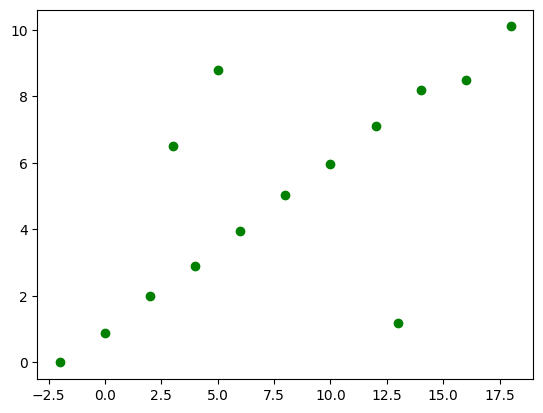

In [3]:
# Plot the original points
fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1], color='green')
plt.show()

In [4]:
# Number of iterations for RANSAC
n_iterations = 1000

# Threshold distance to consider a point an inlier
threshold = 1

# Number of inliers required to accept a model
# Make at least half of the data points accept the model
min_inliers = int(points.shape[0]/2)

best_model = None
best_inliers = []

for i in range(n_iterations):
    # Randomly select two points to define a line
    sample = random.sample(list(points), 2)
    p1, p2 = sample[0], sample[1]

    # Fit a line to the selected points
    v = p2 - p1
    v /= np.linalg.norm(v)  # Rescale the length of v to 1
    d = -np.dot(v, p1)
    model = np.append(v, d)

    # Find inliers within threshold distance
    inliers = []
    for point in points:
        distance = abs(np.dot(point, v) + d) / np.linalg.norm(v)
        if distance < threshold:
            inliers.append(point)

    # Keep the model with the most inliers
    if len(inliers) >= min_inliers and len(inliers) > len(best_inliers):
        best_model = model
        best_inliers = inliers

# Fit a line to the best inliers
v = best_model[:2]
d = best_model[2]
x = np.linspace(-2, 18, 100)
y = (-d - v[0]*x) / v[1]


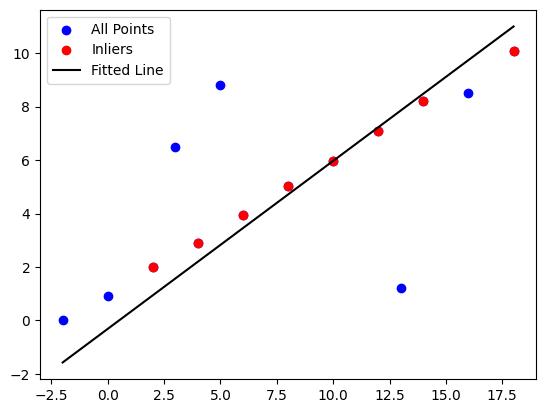

In [5]:
# Plot the points and the fitted line
fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1], color='blue', label='All Points')
ax.scatter([p[0] for p in best_inliers], [p[1] for p in best_inliers], color='red', label='Inliers')
ax.plot(x, y, color='black', label='Fitted Line')
ax.legend()
plt.show()